In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [143]:
data = pd.read_csv('resources/Mall_Customers.csv')

In [144]:
report = ProfileReport(data, title="Customer Segmentation Data Profiling Report", explorative=True)

In [145]:
#report

In [146]:
data.drop('CustomerID', axis=1, inplace=True)

In [147]:
data.select_dtypes(exclude='object')

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [148]:
data_scaled_numerical = pd.DataFrame(StandardScaler().fit_transform(data.select_dtypes(exclude = 'object')), columns = data.select_dtypes(exclude = 'object').columns)

In [149]:
data_scaled_numerical

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [150]:
data = pd.concat([data.select_dtypes(include = 'object'), data_scaled_numerical], axis = 1)

In [151]:
data['Genre'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [152]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1,-0.276302,2.268791,1.118061
196,1,0.441365,2.497807,-0.861839
197,0,-0.491602,2.497807,0.923953
198,0,-0.491602,2.917671,-1.250054


In [153]:
linkage_data = linkage(data, method='ward')

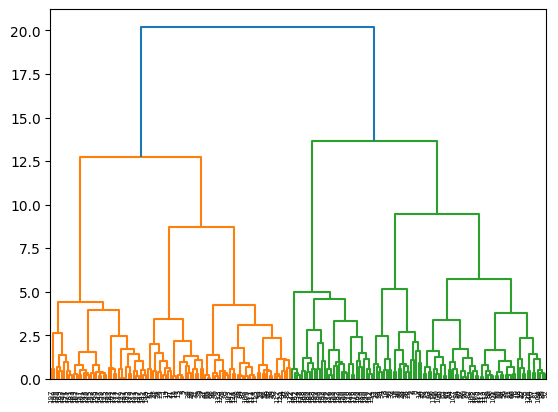

In [154]:
dendrogram(linkage_data)
plt.show()

In [155]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

In [156]:
hierarchical_clustering.fit(data)

AgglomerativeClustering(n_clusters=6)

In [157]:
data_original = pd.read_csv('resources/Mall_Customers.csv')

In [158]:
data_original['hr_label'] = hierarchical_clustering.fit_predict(data)

In [159]:
data_original

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),hr_label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [160]:
data_original['Genre'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [161]:
data_original.groupby('hr_label').mean()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
hr_label,,,,,
0,82.100000,0.500000,54.960000,53.620000,48.240000
1,21.300000,0.650000,43.750000,25.250000,19.050000
2,166.090909,0.454545,41.454545,89.090909,16.181818
3,162.000000,0.538462,32.692308,86.538462,82.128205
4,91.714286,0.714286,26.142857,57.228571,48.685714
5,24.347826,0.565217,25.608696,26.434783,78.521739


In [162]:
# Cluster 0: Oldest, Income Medium, Spending Medium
# Cluster 1: Lowest Income, Spending Low
# Cluster 2: Highest Income, Lowest Spending, More Male
# Cluster 3: High Income, Highest Spending
# Cluster 4: Young Age, Medium Income, Medium Spending, More Female
# Cluster 5: Young, Low Income, High Spending

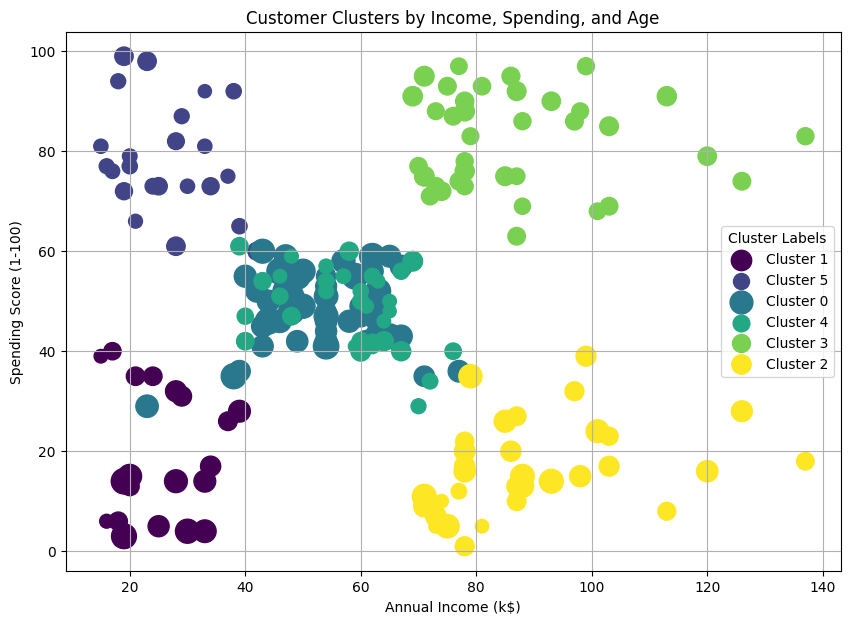

In [163]:
# Get unique cluster labels
unique_labels = data_original['hr_label'].unique()

# Choose a colormap
colors = cm.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 7)) # Set a larger figure size for better visibility

for i, label in enumerate(unique_labels):
    subset = data_original[data_original['hr_label'] == label]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        s=subset['Age'] * 5,  # Size points by Age, scaled for better visual distinction
        color=colors(i),      # Assign a unique color for each cluster
        label=f'Cluster {label}' # Label for the legend
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters by Income, Spending, and Age') # Added a title
plt.legend(title='Cluster Labels') # Added legend with a title
plt.grid(True) # Added grid for readability
plt.show()

In [164]:
print(silhouette_score(data, hierarchical_clustering.fit_predict(data)))

0.3504439354681972
